<a href="https://colab.research.google.com/github/NishithP2004/19CSE305_ML/blob/main/Lab_Session_02_31_07_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nishith P

BL.EN.U4CSE22138

In [24]:
# A1, A2
import pandas as pd
import numpy as np

df = pd.read_excel("./Lab Session Data.xlsx", sheet_name="Purchase data")

purchase_data = df[["Customer", "Candies (#)", "Mangoes (Kg)", "Milk Packets (#)", "Payment (Rs)"]]
print(purchase_data)

print("\nDimensionality of DataFrame:", purchase_data.shape)
print("\nNumber of Vectors:", purchase_data.shape[0])

A = purchase_data[["Candies (#)", "Mangoes (Kg)", "Milk Packets (#)"]].to_numpy()
C = purchase_data[["Payment (Rs)"]].to_numpy()

print("\nRank of A:", np.linalg.matrix_rank(A))

A_inv = np.linalg.pinv(A)
X = np.matmul(A_inv, C)
print("\nX = A_inv * C")
print(X.reshape(1, 3))

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)
0      C_1           20             6                 2           386
1      C_2           16             3                 6           289
2      C_3           27             6                 2           393
3      C_4           19             1                 2           110
4      C_5           24             4                 2           280
5      C_6           22             1                 5           167
6      C_7           15             4                 2           271
7      C_8           18             4                 2           274
8      C_9           21             1                 4           148
9     C_10           16             2                 4           198

Dimensionality of DataFrame: (10, 5)

Number of Vectors: 10

Rank of A: 3

X = A_inv * C
[[ 1. 55. 18.]]


In [31]:
# A3

payment = purchase_data["Payment (Rs)"]

# RICH = np.array([1, 0])
# POOR = np.array([0, 1])
purchase_data.loc[:, "Classification"] = ['RICH' if p > 200 else 'POOR' for p in payment]
print(purchase_data)

classification = purchase_data["Classification"]

# RICH = 0
# POOR = 1
L = np.array([0 if c == "RICH" else 1 for c in classification])
Y = np.matmul(A_inv, L)

print("\nY = A * L")
print(Y)
print("\n")

classified_label = np.matmul(A, Y)
t1 = ["RICH" if c <= 0.5 else "POOR" for c in classified_label]

print(t1)

  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

  Classification  
0           RICH  
1           RICH  
2           RICH  
3           POOR  
4           RICH  
5           POOR  
6           RICH  
7           RICH  
8           POOR  
9     

             Date Month  Day    Price     Open     High      Low   Volume  \
0    Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1    Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2    Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3    Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4    Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   
..            ...   ...  ...      ...      ...      ...      ...      ...   
244  Jul 07, 2020   Jul  Tue  1397.40  1410.00  1411.00  1390.05  480.21K   
245  Jul 06, 2020   Jul  Mon  1400.75  1405.50  1415.50  1394.00  614.93K   
246  Jul 03, 2020   Jul  Fri  1405.10  1415.00  1425.00  1398.00  599.49K   
247  Jul 02, 2020   Jul  Thu  1412.35  1440.00  1467.80  1395.30    2.16M   
248  Jul 01, 2020   Jul  Wed  1363.05  1363.65  1377.00  1356.00  383.00K   

       Chg%  
0    0.0020  
1    0.0043  
2   -0.0020  
3   -0.0026  
4   -

Text(0, 0.5, 'Charge %')

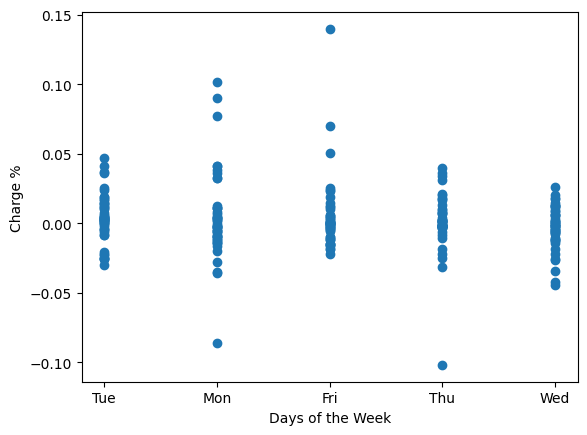

In [26]:
# A4
import statistics as st

irctc_stock = pd.read_excel("./Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

print(irctc_stock)

col_d = irctc_stock["Price"]
mean = st.mean(col_d)
variance = st.variance(col_d)

print(f"Mean: {mean}")
print(f"Variance: {variance}")

wed_price = irctc_stock["Price"][irctc_stock["Day"] == "Wed"]
wed_mean = st.mean(wed_price)
wed_variance = st.variance(wed_price)

print("\n")
print(f"Wed Mean: {wed_mean}")
print(f"Wed Variance: {wed_variance}")

apr_price = irctc_stock["Price"][irctc_stock["Month"] == "Apr"]
apr_mean = st.mean(apr_price)
apr_variance = st.variance(apr_price)

print("\n")
print(f"Apr Mean: {apr_mean}")
print(f"Apr Variance: {apr_variance}")
print("\n")

loss = len(list(filter(lambda a: float(a) < 0, irctc_stock["Chg%"])))
total = len(irctc_stock["Chg%"])
prob_loss = (loss / total) * 100

print(f"Probability of Loss: {prob_loss} %")

wed_chgs = irctc_stock["Chg%"][irctc_stock["Day"] == "Wed"]
wed_total = len(wed_chgs)
wed_profit = len(list(filter(lambda a: float(a) > 0, wed_chgs)))
wed_prob_profit = (wed_profit / wed_total) * 100

print(f"Probability of Profit on Wednesday: {wed_prob_profit} %")

# Conditional Probability
G_int_W = len(list(filter(lambda a: float(a) > 0, irctc_stock["Chg%"][irctc_stock["Day"] == "Wed"]))) / total
prob_W = wed_total / total
cond_prob_G_W = (G_int_W / prob_W) * 100

print(f"Conditional Probability P(G / w): {cond_prob_G_W} %")

# Plotting a Scatter Plot

import matplotlib.pyplot as plt

plt.scatter(irctc_stock["Day"], irctc_stock["Chg%"])

plt.xlabel("Days of the Week")
plt.ylabel("Charge %")

In [27]:
# A5 - A7
import statistics as st

na_values = [np.NaN, "?", "NaN", None, np.nan, np.NAN]

def fill_categorical_data(v):
  mode = st.mode(v)

  return pd.Series(v).fillna(mode)

def z_score(x, mean, sd):
  return (x - mean) / sd

def has_outlier(v, mean, sd):
  for i in range(len(v)):
    if not pd.isna(v[i]) and abs(z_score(v[i], mean, sd)) >= 3:
      return True
  return False

def fill_nominal_data(v):
  v = pd.Series(v)
  mean = v.mean()
  sd = v.std()
  median = v.median()
  has_outlier_v = has_outlier(v, mean, sd)

  for i in range(len(v)):
    if pd.isna(v[i]):
      v[i] = mean
    elif abs(z_score(v[i], mean, sd)) >= 3:
      v[i] = median

  return v.to_numpy()


thyroid_ds = pd.read_excel("./Lab Session Data.xlsx", sheet_name="thyroid0387_UCI", na_values=na_values)

thyroid_ds["sex"] = fill_categorical_data(thyroid_ds["sex"])
nominal_data = ["TSH", "T3", "TT4", "T4U", "FTI", "TBG"]

for value in nominal_data:
  thyroid_ds[value] = fill_nominal_data(thyroid_ds[value])

categorical_data = ["sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", "sick", "pregnant", "thyroid surgery", "I131 treatment", "query hypothyroid", "query hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary", "psych", "TSH measured", "T3 measured", "TT4 measured", "T4U measured", "FTI measured", "TBG measured", "referral source", "Condition"]

print(thyroid_ds.isnull().sum())

Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype: int64


In [28]:
# A8

def f(v1, v2):
  f00 = 0
  f01 = 0
  f10 = 0
  f11 = 0

  for i in range(len(v1)):
    if v1[i] == 0 and v2[i] == 0:
      f00 += 1
    elif v1[i] == 0 and v2[i] == 1:
      f01 += 1
    elif v1[i] == 1 and v2[i] == 0:
      f10 += 1
    elif v1[i] == 1 and v2[i] == 1:
      f11 += 1

  return f00, f01, f10, f11

def JC(v1, v2):
  f00, f01, f10, f11 = f(v1, v2)

  return ((f11) / (f01 + f10 + f11))

def SMC(v1, v2):
  f00, f01, f10, f11 = f(v1, v2)

  return ((f11 + f00) / (f00 + f01 + f10 + f11))

features_vec = thyroid_ds.loc[:1, ["sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", "sick", "pregnant", "thyroid surgery", "I131 treatment", "query hypothyroid", "query hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary", "psych", "TSH measured", "T3 measured", "TT4 measured", "T4U measured", "FTI measured", "TBG measured"]]
print(features_vec)

v1 = [0 if f.lower() == 'f' else 1 for f in features_vec.iloc[0]]
v2 = [0 if f.lower() == 'f' else 1 for f in features_vec.iloc[1]]

print(f"JC = {JC(v1, v2)}")
print(f"SMC = {SMC(v1, v2)}")

  sex on thyroxine query on thyroxine on antithyroid medication sick pregnant  \
0   F            f                  f                         f    f        f   
1   F            f                  f                         f    f        f   

  thyroid surgery I131 treatment query hypothyroid query hyperthyroid  ...  \
0               f              f                 t                  f  ...   
1               f              f                 f                  f  ...   

  goitre tumor hypopituitary psych TSH measured T3 measured TT4 measured  \
0      f     f             f     f            t           f            f   
1      f     f             f     f            t           t            t   

  T4U measured FTI measured TBG measured  
0            f            f            f  
1            f            f            f  

[2 rows x 21 columns]
JC = 0.25
SMC = 0.8571428571428571


In [29]:
# A9

def cosine_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  norm_v1 = np.linalg.norm(v1)
  norm_v2 = np.linalg.norm(v2)

  cos_sim = dot_product / (norm_v1 * norm_v2)

  return cos_sim

thyroid_ds_encoded = pd.get_dummies(thyroid_ds)

d1_vec = thyroid_ds_encoded.iloc[0].to_numpy()
d2_vec = thyroid_ds_encoded.iloc[1].to_numpy()

cos_sim = cosine_similarity(d1_vec, d2_vec)
print(f"Cosine Similarity: {cos_sim}")

Cosine Similarity: 0.9999999999999997


Iteration 1: 
JC = 0.7692307692307693
SMC = 0.925
Cosine Similarity: 0.9999999999999997


Iteration 2: 
JC = 0.6428571428571429
SMC = 0.875
Cosine Similarity: 0.9999999999999997


Iteration 3: 
JC = 0.9166666666666666
SMC = 0.975
Cosine Similarity: 0.9999999999999998


Iteration 4: 
JC = 0.9166666666666666
SMC = 0.975
Cosine Similarity: 0.9999999999999998


Iteration 5: 
JC = 0.9166666666666666
SMC = 0.975
Cosine Similarity: 0.9999999999999992


Iteration 6: 
JC = 1.0
SMC = 1.0
Cosine Similarity: 0.9999999999999998


Iteration 7: 
JC = 0.6428571428571429
SMC = 0.875
Cosine Similarity: 0.9999999999999986


Iteration 8: 
JC = 0.9166666666666666
SMC = 0.975
Cosine Similarity: 0.9999999999999991


Iteration 9: 
JC = 1.0
SMC = 1.0
Cosine Similarity: 1.0


Iteration 10: 
JC = 1.0
SMC = 1.0
Cosine Similarity: 0.9999999999999974


Iteration 11: 
JC = 1.0
SMC = 1.0
Cosine Similarity: 0.9999999999999992


Iteration 12: 
JC = 0.7037037037037037
SMC = 0.9
Cosine Similarity: 1.0


Iteration 13: 
JC

<Axes: >

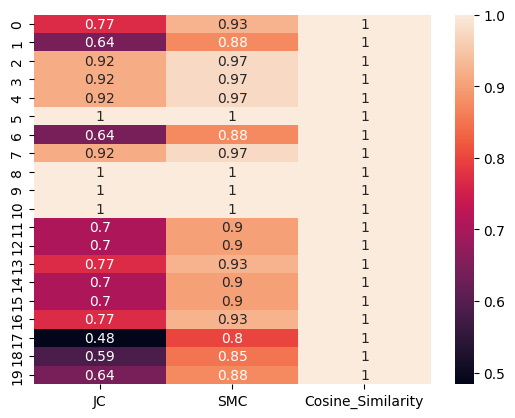

In [30]:
# A10
import seaborn as sns

n = 20
similarities = []
for i in range(n):
  v1 = thyroid_ds_encoded.iloc[i].to_numpy()
  v2 = thyroid_ds_encoded.iloc[i+1].to_numpy()

  JC_v = JC(v1, v2)
  SMC_v = SMC(v1, v2)
  cos_sim = cosine_similarity(v1, v2)

  print(f"Iteration {i+1}: ")

  print(f"JC = {JC_v}")
  print(f"SMC = {SMC_v}")
  print(f"Cosine Similarity: {cos_sim}")
  print("\n")

  similarities.append({
      "JC": JC_v,
      "SMC": SMC_v,
      "Cosine_Similarity": cos_sim
  })

similarities_df = pd.DataFrame(similarities)

sns.heatmap(similarities_df, annot=True)
